## Laborator 4

## Obiective

* familiaziraze cu tensorflow slim.
* modificarea unei retele neurale in slim
* vizualizare date input
* vizualizare activari
* tf.metrics


## Pasul 0. Upload dependinte Python#

* cifar10.py
* download.py
* dataset.py
* cache.py


In [1]:

from google.colab import files
uploaded = files.upload()
print("OK")

Saving download.py to download.py
Saving dataset.py to dataset.py
Saving cifar10.py to cifar10.py
Saving cache.py to cache.py
OK


In [2]:
# verificam ca totul este ok
!ls .

cache.py  cifar10.py  datalab  dataset.py  download.py


## Pasul 1. Incarcarea dataset-ului

In [0]:
import cifar10


In [4]:
cifar10.maybe_download_and_extract()

- Download progress: 100.0%
Download finished. Extracting files.
Done.


In [5]:
%ls data/CIFAR-10

cifar-10-batches-py/  cifar-10-python.tar.gz


## Pasul 2. Inspecatarea dataset-ului. Histograma + Imagini sample

In [7]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [8]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [9]:
import numpy as np

print(images_train.shape)
print(images_test.shape)

# one hot encodings
print(labels_train.shape)
print(labels_test.shape)

# class labels
print(cls_train.shape)
print(cls_test.shape)


print("Train count {}".format(images_train.shape[0]))
print("Test count {}".format(images_test.shape[0]))

cls_ids = np.unique(cls_train)
print("Class labels {}.".format(cls_ids))

n_classes = len(cls_ids)
print("Num classes {}".format(n_classes))





(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)
(50000,)
(10000,)
Train count 50000
Test count 10000
Class labels [0 1 2 3 4 5 6 7 8 9].
Num classes 10


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import os

In [0]:
# check data statistics

def get_stats(labels):
    stats = np.zeros(n_classes)
    for e in labels:
        stats[e] += 1
    return stats
  
# bar_width = 0.
def plot_stats(stats, title):
    plt.figure()
    x = range(n_classes)
    plt.title(title)
    plt.bar(x, stats)

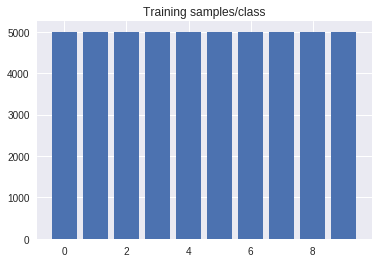

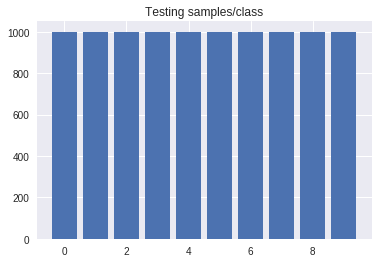

In [12]:
y_train = cls_train
y_test = cls_test

X_train = images_train
X_test = images_test

train_stats = get_stats(y_train)
test_stats = get_stats(y_test)

plt.figure()
plot_stats(train_stats, "Training samples/class")
plot_stats(test_stats, "Testing samples/class")

### Vizualizati dataset-ul cu sample-uri din fiecare clasa.

In [0]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true) == 9

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing if we need to print ensemble and best-net.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Interpolation type.
        if smooth:
            interpolation = 'spline16'
        else:
            interpolation = 'nearest'

        # Plot image.
        ax.imshow(images[i, :, :, :],
                  interpolation=interpolation)
            
        # Name of the true class.
        cls_true_name = class_names[cls_true[i]]

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true_name)
        else:
            # Name of the predicted class.
            cls_pred_name = class_names[cls_pred[i]]

            xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

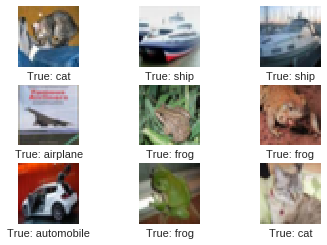

In [14]:
# Get the first images from the test-set.
images = images_test[0:9]

# Get the true classes for those images.
cls_true = cls_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=False)

In [15]:
num_samples = 10

image_shape = images_train.shape[1:]

img_height, img_width = image_shape[0], image_shape[1]

print("hxw {}x{}".format(img_height, img_width))

def draw_samples(X, y, y_target, num_cl, colormap = None):
    c_ids = np.where(y == y_target)
    selected_idx = random.sample(c_ids[0].tolist(), num_samples)
    for i, idx in enumerate(selected_idx):
        plt.subplot(num_cl, num_samples, (num_samples * y_target) + i + 1)
        plt.axis('off')
        plt.imshow(X[idx], colormap)

hxw 32x32


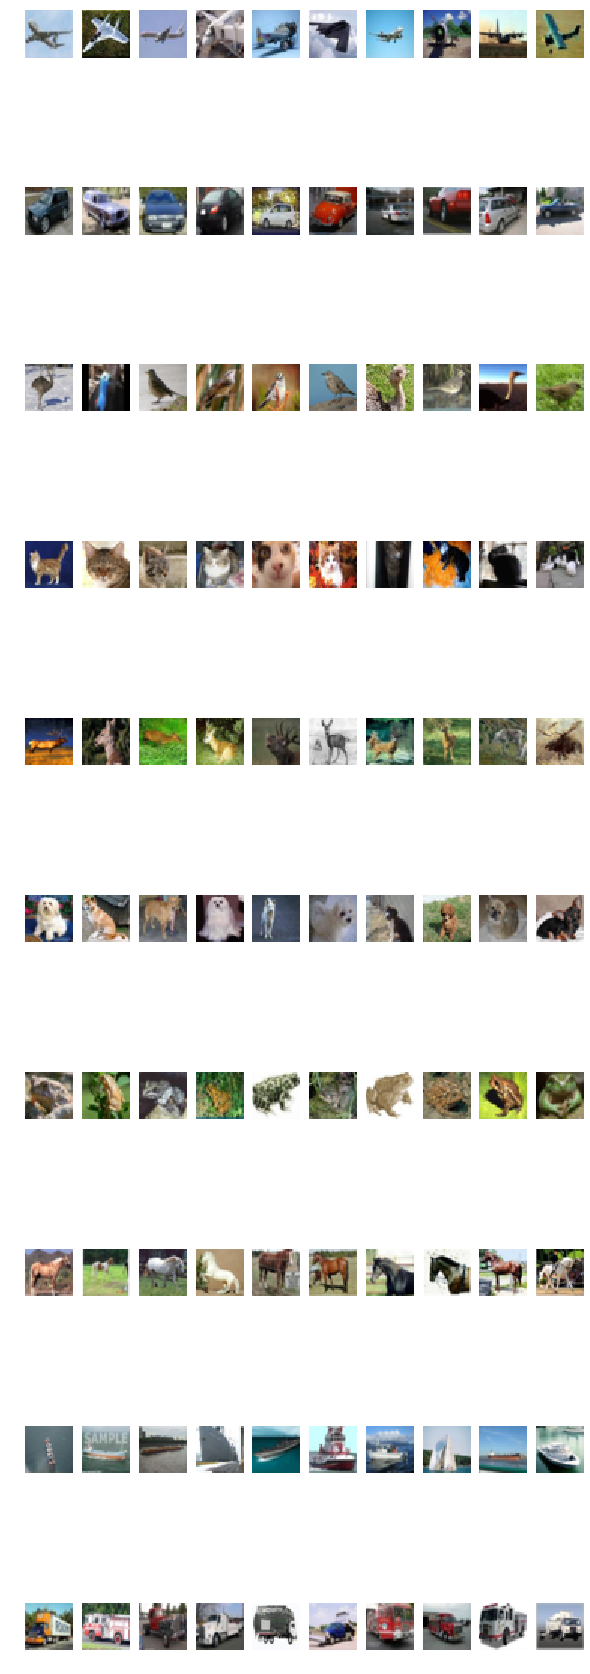

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# index = random.randint(0, len(X_train))
# image = X_train[index].squeeze()



plt.figure(figsize=(num_samples, img_width))
for c in range(n_classes):
    draw_samples(X_train, y_train, c, n_classes)
# 
# plt.imshow(image)
# plt.axis('off')
# print(y_train[index])

## Pasul 3. Definirea modelului in TensorFlow

### *Nota* Vom folosi tensoflow slim pentru a ne face viata mai usoara.

In [0]:
import tensorflow as tf

slim = tf.contrib.slim
trunc_normal = lambda stddev: tf.truncated_normal_initializer(stddev=stddev)


## Definirea unui argument scope. 

Un argument scope furnizeaza parametri default pentru operatiile din slim.
Pentru a consulta parametri default, ne putem uita direct in codul sursa:

https://github.com/tensorflow/tensorflow/blob/master/tensorflow/contrib/layers/python/layers/layers.py#L917

In [0]:
def cifarnet_arg_scope(weight_decay=0.004, is_training=True):
  """Defines the default cifarnet argument scope.

  Args:
    weight_decay: The weight decay to use for regularizing the model.

  Returns:
    An `arg_scope` to use for the cifarnet model.
  """
  with slim.arg_scope(
      [slim.conv2d],
      weights_initializer=tf.truncated_normal_initializer(stddev=5e-2),
        normalizer_fn=slim.batch_norm,
      activation_fn=tf.nn.relu):
    with slim.arg_scope(
        [slim.fully_connected],
        biases_initializer=tf.constant_initializer(0.1),
        weights_initializer=trunc_normal(0.04),
        weights_regularizer=slim.l2_regularizer(weight_decay),
        activation_fn=tf.nn.relu) as sc:
        return sc


## CifarNet

In [0]:
trunc_normal = lambda stddev: tf.truncated_normal_initializer(stddev=stddev)

def cifarnet(images, num_classes=10, is_training=False,
             dropout_keep_prob=0.5,
             prediction_fn=slim.softmax,
             scope='CifarNet'):
 
    end_points = {}
  
    with tf.variable_scope(scope, 'CifarNet', [images]):
        net = slim.conv2d(images, 64, [5, 5], scope='conv1')
        end_points['conv1'] = net
        net = slim.max_pool2d(net, [2, 2], 2, scope='pool1')
        end_points['pool1'] = net
        net = slim.conv2d(net, 64, [5, 5], scope='conv2')
        end_points['conv2'] = net
        net = slim.max_pool2d(net, [2, 2], 2, scope='pool2')
        end_points['pool2'] = net
        net = slim.flatten(net)
        end_points['Flatten'] = net
        net = slim.fully_connected(net, 384, scope='fc3')
        end_points['fc3'] = net
        net = slim.dropout(net, dropout_keep_prob, is_training=is_training,
                           scope='dropout3')
        net = slim.fully_connected(net, 192, scope='fc4')
        end_points['fc4'] = net
        if not num_classes:
            return net, end_points
        logits = slim.fully_connected(net, num_classes,
                                      biases_initializer=tf.zeros_initializer(),
                                      weights_initializer=trunc_normal(1/192.0),
                                      weights_regularizer=None,
                                      activation_fn=None,
                                      scope='logits')
    
        end_points['Logits'] = logits
        end_points['Predictions'] = prediction_fn(logits, scope='Predictions')

    return logits, end_points

In [0]:
# parametri de training si input
batch_size = 32
height = 32
width = 32
channels = 3
num_classes = 10
initial_learning_rate = 0.05

### Adaugarea conexiunilor de intrare. tf.placeholders

In [0]:
def add_placeholders():
    def _process_image(augment_level, image):
        # Because these operations are not commutative, consider randomizing
        # randomize the order their operation.
        if augment_level > 0:
            image = tf.image.random_brightness(image, max_delta=63. / 255.)
            image = tf.image.random_contrast(image, lower=0.2, upper=1.8)
        if augment_level > 1:
            saturation = lambda x: tf.image.random_saturation(x, lower=0.5, upper=1.6)
            image = tf.map_fn(saturation, image)
            hue = lambda x: tf.image.random_hue(image, max_delta=0.15)
            image = tf.map_fn(hue, image)
        if augment_level > 2:
            flip = lambda x: tf.image.random_flip_left_right(image)
            image = tf.map_fn(flip, image)
        image = tf.minimum(image, 255.0)
        image = tf.maximum(image, 0)
        return image

    # image batch input
    image_input = tf.placeholder(
        tf.float32, [batch_size, height, width, 3],
        name='image_input'
    )

    label_input = tf.placeholder(
        tf.int64, [batch_size],
        name='label_input'
    )

    is_training = tf.placeholder(tf.bool, name='is_training')

    learning_rate = tf.placeholder(tf.float32, shape=[])

    if is_training is not None:
        scaled_input_tensor = tf.scalar_mul((1.0 / 255), _process_image(1, image_input))
    else:
        scaled_input_tensor = tf.scalar_mul((1.0 / 255), image_input)

    scaled_input_tensor = tf.subtract(scaled_input_tensor, 0.5)
    scaled_input_tensor = tf.multiply(scaled_input_tensor, 2.0)

    return scaled_input_tensor, label_input, is_training, learning_rate


### Nota
Pentru augmentare adaugati o operatie tensorflow in input:

```

if is_training:
    scaled_input_tensor = tf.scalar_mul((1.0 / 255), _process_image(1, image_input))
else:
    scaled_input_tensor = tf.scalar_mul((1.0 / 255), self.image_input)

scaled_input_tensor = tf.subtract(scaled_input_tensor, 0.5)
self.scaled_input_tensor = tf.multiply(scaled_input_tensor, 2.0)

```

Mai sus se opereaza folosind `_process_image` augmenatere de brgithnes si saturation.
Inainte, input-ul este normalizat.

Normalizarea se efectueaza atat la training cat si la testing.
Augmentarea se efectueaza doar la training si are rol in generelizare.

Puteti folosi si horizontal flipping `tf.image.random_flip_left_right`

https://www.tensorflow.org/api_docs/python/tf/image/random_flip_left_right


In [22]:
images_train.shape

(50000, 32, 32, 3)

In [23]:
labels_train.shape

(50000, 10)

In [24]:
np.unique(cls_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Functie helper pentru a incarca un minibatch random la training

In [0]:
def random_batch(img, labels):
    # Number of images in the training-set.
    num_images = len(img)
    #     print(num_images)

    # Create a random index.
    idx = np.random.choice(num_images,
                           size=batch_size,
                           replace=False)

    # Use the random index to select random images and labels.
    x_batch = img[idx, :, :, :]
    y_batch = labels[idx]

    return x_batch, y_batch

In [26]:
x, y = random_batch(X_train, y_train)

y.shape

(32,)

### Functie helper pentru obtinirea unui batch la test. Nu facem shuffle la test

In [27]:
def get_batch(imgs, labels, step):
  offset = (step * batch_size) % (labels.shape[0] - batch_size)
#   print(offset)
  batch_imgs = imgs[offset:(offset + batch_size), :, :, :]
  batch_labels = labels[offset:(offset + batch_size)]
  
  return batch_imgs, batch_labels
  
batch_imgs, batch_labels = get_batch(images_test, cls_test, 2)
  
print(batch_imgs.shape)
print(batch_labels.shape)
  

(32, 32, 32, 3)
(32,)


### Functie pentru evaluare acuratete

In [0]:
#evaluate model



def evaluate():
  total_examples = cls_test.shape[0]  
  iters = int(total_examples/batch_size)
#   print("Total examples {}".format(total_examples))
#   print("Total iters {}".format(iters))
  
  
  acc = []
  losses = []
    
  for i in range(iters):
    
    x, y = get_batch(images_test, cls_test, i)

    feed_dict = {

        image_input: x,
        label_input: y,
        is_training: False

    }

    testAcc, testLoss = sess.run([accuracy, loss], feed_dict=feed_dict)
    acc.append(testAcc)
    losses.append(testLoss)
    #if i % 100 == 0:
    #  print("Test " + str(i) + ": accuracy:" + str(testAcc) + " loss: " + str(testLoss))
    
      
#   print(acc)
  meanAcc = np.mean(np.asarray(acc))
  meanLoss = np.mean(np.asarray(losses))
  
#   print("Test Accuracy {:.2f} %".format(meanAcc * 100))
  
  return meanAcc, meanLoss
  
  
#evaluate()               


In [0]:
trainingAccuracyList = []
trainingLossList = []
testAccuracyList = []
testLossList = []
learningRateList = []

### Definirea pasilor de antrenare

In [40]:

num_steps = 50000
num_examples = images_train.shape[0]
iters = num_examples / batch_size
learning_rate_step = 20000
learning_rate_decay = 0.1

tf.reset_default_graph()

g = tf.Graph().as_default()
image_input, label_input, is_training, learning_rate = add_placeholders()


arg_scope = cifarnet_arg_scope(is_training=is_training)
with slim.arg_scope(arg_scope):
  logits, end_points = cifarnet(image_input, is_training=is_training)

loss = tf.reduce_mean(
  tf.nn.sparse_softmax_cross_entropy_with_logits(labels=label_input, logits=logits))

# accuracy of the trained model, between 0 (worst) and 1 (best)
predictions = end_points['Predictions']

correct_prediction = tf.equal(tf.argmax(predictions, 1), label_input)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


init = tf.global_variables_initializer()


sess = tf.Session()
# actually initialize our variables
sess.run(init)



# Optimizer.
# optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# for batch norm training. Note: we should use slim.train_op

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
  # Ensures that we execute the update_ops before performing the train_step
  optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)
  

  
running_lr = initial_learning_rate

print("Starting optimization")
print("Initial LR {}. LR stepdown itnerval {}. LR deacy factor {}".format(running_lr, learning_rate_step, learning_rate_decay))

for i in range(num_steps):
  x, y = random_batch(X_train, y_train)

  feed_dict = {

      image_input: x,
      label_input: y,
      is_training: True,
      learning_rate : running_lr

  }

  if i % 200 == 0:
      _, trainAcc, trainLoss = sess.run([optimizer, accuracy, loss], feed_dict=feed_dict)
      
      testAcc, testLoss = evaluate()
      
      print("Train " + str(i) + ": accuracy:" + str(trainAcc) + " loss: " + str(trainLoss))
      print("Test " + str(i) + ": accuracy:" + str(testAcc) + " loss: " + str(testLoss))
      
      trainingAccuracyList.append(trainAcc)
      trainingLossList.append(trainLoss)
      testAccuracyList.append(testAcc)
      testLossList.append(testLoss)
      learningRateList.append(running_lr)
     
  else:
      sess.run([optimizer], feed_dict=feed_dict)
  
  
  if  i > 0 and i % learning_rate_step == 0:
      print("Learning reate step down. Old {}. New {}".format(running_lr, running_lr * learning_rate_decay))
      running_lr = running_lr * learning_rate_decay
      
          
    




      

Starting optimization
Initial LR 0.05. LR stepdown itnerval 20000. LR deacy factor 0.1
Train 0: accuracy:0.0625 loss: 2.3150506
Test 0: accuracy:0.100160256 loss: 2.3524544
Train 200: accuracy:0.4375 loss: 1.7168372
Test 200: accuracy:0.40534857 loss: 1.6556131
Train 400: accuracy:0.3125 loss: 1.5297422
Test 400: accuracy:0.38992387 loss: 1.6684622
Train 600: accuracy:0.34375 loss: 1.8853471
Test 600: accuracy:0.47395834 loss: 1.4638928
Train 800: accuracy:0.34375 loss: 1.5283041
Test 800: accuracy:0.49308893 loss: 1.4086462
Train 1000: accuracy:0.4375 loss: 1.5526991
Test 1000: accuracy:0.4926883 loss: 1.4016911
Train 1200: accuracy:0.65625 loss: 1.2409704
Test 1200: accuracy:0.5110176 loss: 1.3580947
Train 1400: accuracy:0.71875 loss: 1.1073112
Test 1400: accuracy:0.54036456 loss: 1.2889776
Train 1600: accuracy:0.59375 loss: 1.0832397
Test 1600: accuracy:0.5350561 loss: 1.279783
Train 1800: accuracy:0.5 loss: 1.2604511
Test 1800: accuracy:0.5433694 loss: 1.2716827
Train 2000: accurac

Train 9000: accuracy:0.78125 loss: 0.6130447
Test 9000: accuracy:0.731871 loss: 0.7897608
Train 9200: accuracy:0.8125 loss: 0.47128236
Test 9200: accuracy:0.71905047 loss: 0.8080914
Train 9400: accuracy:0.75 loss: 0.7809843
Test 9400: accuracy:0.72616184 loss: 0.7981703
Train 9600: accuracy:0.78125 loss: 0.6375756
Test 9600: accuracy:0.7235577 loss: 0.801129
Train 9800: accuracy:0.625 loss: 0.8708674
Test 9800: accuracy:0.7203526 loss: 0.8012575
Train 10000: accuracy:0.65625 loss: 0.90449905
Test 10000: accuracy:0.721855 loss: 0.8040831
Train 10200: accuracy:0.6875 loss: 0.8970049
Test 10200: accuracy:0.7333734 loss: 0.7661664
Train 10400: accuracy:0.8125 loss: 0.76973015
Test 10400: accuracy:0.72896636 loss: 0.7794322
Train 10600: accuracy:0.84375 loss: 0.71532756
Test 10600: accuracy:0.73197114 loss: 0.7741366
Train 10800: accuracy:0.71875 loss: 0.9916891
Test 10800: accuracy:0.7199519 loss: 0.8015555
Train 11000: accuracy:0.6875 loss: 1.203728
Test 11000: accuracy:0.72836536 loss: 0

Train 18000: accuracy:0.8125 loss: 0.5552451
Test 18000: accuracy:0.75811297 loss: 0.72088134
Train 18200: accuracy:0.84375 loss: 0.41951993
Test 18200: accuracy:0.75440705 loss: 0.7355294
Train 18400: accuracy:0.8125 loss: 0.38384756
Test 18400: accuracy:0.76061696 loss: 0.71696156
Train 18600: accuracy:0.875 loss: 0.38930273
Test 18600: accuracy:0.75771236 loss: 0.72981596
Train 18800: accuracy:0.6875 loss: 0.645849
Test 18800: accuracy:0.7608173 loss: 0.7235599
Train 19000: accuracy:0.71875 loss: 0.69160664
Test 19000: accuracy:0.75921476 loss: 0.7270975
Train 19200: accuracy:0.78125 loss: 0.59892887
Test 19200: accuracy:0.75871396 loss: 0.72353864
Train 19400: accuracy:0.90625 loss: 0.48294827
Test 19400: accuracy:0.7542067 loss: 0.734104
Train 19600: accuracy:0.96875 loss: 0.18292676
Test 19600: accuracy:0.75911456 loss: 0.72230715
Train 19800: accuracy:0.78125 loss: 0.46682942
Test 19800: accuracy:0.76382214 loss: 0.72279924
Train 20000: accuracy:0.84375 loss: 0.31406382
Test 200

Train 27000: accuracy:0.9375 loss: 0.19779986
Test 27000: accuracy:0.78135014 loss: 0.6923917
Train 27200: accuracy:0.90625 loss: 0.25817657
Test 27200: accuracy:0.78114986 loss: 0.6928523
Train 27400: accuracy:0.875 loss: 0.43010014
Test 27400: accuracy:0.78135014 loss: 0.69064486
Train 27600: accuracy:0.875 loss: 0.30931413
Test 27600: accuracy:0.78355366 loss: 0.6923169
Train 27800: accuracy:0.875 loss: 0.32151294
Test 27800: accuracy:0.78145033 loss: 0.6943439
Train 28000: accuracy:0.875 loss: 0.3569157
Test 28000: accuracy:0.78305286 loss: 0.69587004
Train 28200: accuracy:0.84375 loss: 0.42111006
Test 28200: accuracy:0.78155047 loss: 0.6941849
Train 28400: accuracy:0.90625 loss: 0.24533205
Test 28400: accuracy:0.78265226 loss: 0.6924889
Train 28600: accuracy:0.9375 loss: 0.14626883
Test 28600: accuracy:0.7838542 loss: 0.69737035
Train 28800: accuracy:0.90625 loss: 0.35979038
Test 28800: accuracy:0.7842548 loss: 0.6973382
Train 29000: accuracy:0.9375 loss: 0.27292502
Test 29000: ac

Train 36000: accuracy:0.90625 loss: 0.40575927
Test 36000: accuracy:0.7857572 loss: 0.71163684
Train 36200: accuracy:0.96875 loss: 0.13358761
Test 36200: accuracy:0.7842548 loss: 0.7082227
Train 36400: accuracy:0.96875 loss: 0.11681098
Test 36400: accuracy:0.78365386 loss: 0.7151741
Train 36600: accuracy:0.96875 loss: 0.15316918
Test 36600: accuracy:0.7859575 loss: 0.7121216
Train 36800: accuracy:0.90625 loss: 0.22781862
Test 36800: accuracy:0.7842548 loss: 0.71701336
Train 37000: accuracy:0.875 loss: 0.34022707
Test 37000: accuracy:0.7854567 loss: 0.71960956
Train 37200: accuracy:0.875 loss: 0.3464913
Test 37200: accuracy:0.7865585 loss: 0.7175646
Train 37400: accuracy:0.90625 loss: 0.22463839
Test 37400: accuracy:0.7847556 loss: 0.72008926
Train 37600: accuracy:0.9375 loss: 0.25693676
Test 37600: accuracy:0.78665864 loss: 0.7210577
Train 37800: accuracy:0.8125 loss: 0.6469592
Test 37800: accuracy:0.78625804 loss: 0.7219034
Train 38000: accuracy:0.84375 loss: 0.35503194
Test 38000: ac

Train 45000: accuracy:1.0 loss: 0.10551494
Test 45000: accuracy:0.7869591 loss: 0.72395664
Train 45200: accuracy:0.84375 loss: 0.38579255
Test 45200: accuracy:0.7873598 loss: 0.7238365
Train 45400: accuracy:0.96875 loss: 0.20351095
Test 45400: accuracy:0.7874599 loss: 0.7239863
Train 45600: accuracy:0.90625 loss: 0.17172666
Test 45600: accuracy:0.7874599 loss: 0.723403
Train 45800: accuracy:1.0 loss: 0.048377044
Test 45800: accuracy:0.7864583 loss: 0.7232169
Train 46000: accuracy:0.875 loss: 0.2627602
Test 46000: accuracy:0.7879607 loss: 0.7236316
Train 46200: accuracy:0.9375 loss: 0.20138559
Test 46200: accuracy:0.7883614 loss: 0.723309
Train 46400: accuracy:0.8125 loss: 0.38518333
Test 46400: accuracy:0.7880609 loss: 0.7240399
Train 46600: accuracy:0.96875 loss: 0.16520324
Test 46600: accuracy:0.7879607 loss: 0.7244689
Train 46800: accuracy:0.8125 loss: 0.35918185
Test 46800: accuracy:0.78846157 loss: 0.7237505
Train 47000: accuracy:0.9375 loss: 0.18520734
Test 47000: accuracy:0.7880

### Plotting

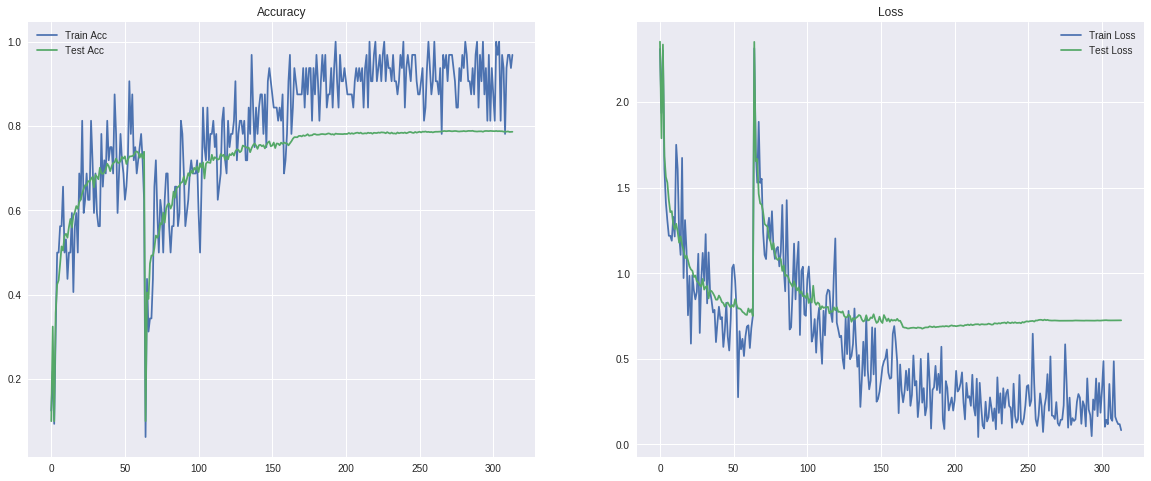

In [41]:
plt.figure(figsize=(20,8))

# Plot Accuracy
plt.subplot(1,2,1);
plt.plot(trainingAccuracyList, label="Train Acc");
plt.plot(testAccuracyList, label="Test Acc");
plt.title("Accuracy");
plt.legend();

# Plot Loss
plt.subplot(1,2,2);
plt.plot(trainingLossList, label="Train Loss");
plt.plot(testLossList, label="Test Loss");
plt.title("Loss");
plt.legend();

## Evaluate final model

In [42]:

  
acc, test_loss = evaluate()

print("Test accuracy:" + str(acc) + " loss: " + str(test_loss))
                   

Test accuracy:0.7865585 loss: 0.7258234


## Save a model checkpoint. Restoring a model checkpoint

In [43]:
# Save / restore model

#!mkdir ckpts

vars_to_save = tf.global_variables()
saver = tf.train.Saver(var_list=vars_to_save)


model_name ='./ckpts/cifarnet-baseline.ckpt'
saver.save(sess, model_name, global_step=num_steps)
print(vars_to_save)

[<tf.Variable 'CifarNet/conv1/weights:0' shape=(5, 5, 3, 64) dtype=float32_ref>, <tf.Variable 'CifarNet/conv1/BatchNorm/beta:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'CifarNet/conv1/BatchNorm/moving_mean:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'CifarNet/conv1/BatchNorm/moving_variance:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'CifarNet/conv2/weights:0' shape=(5, 5, 64, 64) dtype=float32_ref>, <tf.Variable 'CifarNet/conv2/BatchNorm/beta:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'CifarNet/conv2/BatchNorm/moving_mean:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'CifarNet/conv2/BatchNorm/moving_variance:0' shape=(64,) dtype=float32_ref>, <tf.Variable 'CifarNet/fc3/weights:0' shape=(4096, 384) dtype=float32_ref>, <tf.Variable 'CifarNet/fc3/biases:0' shape=(384,) dtype=float32_ref>, <tf.Variable 'CifarNet/fc4/weights:0' shape=(384, 192) dtype=float32_ref>, <tf.Variable 'CifarNet/fc4/biases:0' shape=(192,) dtype=float32_ref>, <tf.Variable 'CifarNet/logits/weights

## Exmplu calcul acuratete folosint tf.metrics

`tf.metrics.accuracy` 

```
labels = ...
predictions = ...
accuracy, update_op_acc = tf.metrics.accuracy(
    labels, predictions)
error, update_op_error = tf.metrics.mean_absolute_error(
    labels, predictions)

sess.run(tf.local_variables_initializer())
for batch in range(num_batches):
  sess.run([update_op_acc, update_op_error])

accuracy, mean_absolute_error = sess.run([accuracy, mean_absolute_error])

```

https://www.tensorflow.org/api_docs/python/tf/metrics


## Testing model restore works

In [45]:
# test restore works
evaluate()
sess.run(init)
evaluate()
vars_to_restore = tf.global_variables()
saver = tf.train.Saver(var_list=vars_to_restore)
model_to_restore = "{}-{}".format(model_name, num_steps)
saver.restore(sess, model_to_restore)
evaluate()

INFO:tensorflow:Restoring parameters from ./ckpts/cifarnet-baseline.ckpt-50000


(0.7865585, 0.7258234)

In [0]:
#!ls ./ckpts

### One hot encoding

In [46]:
x, y = get_batch(images_test, cls_test, i)

y = y[:4]
print(y)
print(num_classes)

res = tf.one_hot(indices=y, depth=num_classes)
print(sess.run(res))

[8 6 1 0]
10
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Masurarea performantelor retelei folosind tf.metrics

In [47]:
# Remember

# predictions = end_points['Predictions']
# correct_prediction = tf.equal(tf.argmax(predictions, 1), label_input)
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# adaugam on nod pentru one hot

labels = tf.one_hot(indices=label_input, depth=num_classes)
# accuracy_streamed, update_op_acc = tf.contrib.metrics.streaming_accuracy(label_input, tf.argmax(predictions, 1))

accuracy_streamed, update_op_acc = tf.metrics.accuracy(label_input, tf.argmax(predictions, 1))

# init = tf.global_variables_initializer()
sess.run(tf.local_variables_initializer())
  

vars_to_restore = tf.global_variables()
saver = tf.train.Saver(var_list=vars_to_restore)
saver.restore(sess, model_to_restore)

evaluate()


INFO:tensorflow:Restoring parameters from ./ckpts/cifarnet-baseline.ckpt-50000


(0.7865585, 0.7258234)

In [48]:

def evaluate_streaming():
  total_examples = cls_test.shape[0]
  num_batches = int(total_examples / batch_size)
  print("Total examples {}".format(total_examples))
  print("Total iters {}".format(num_batches))
  
  for i in range(num_batches):
    
    x, y = get_batch(images_test, cls_test, i)

    feed_dict = {

        image_input: x,
        label_input: y,
        is_training: False

    }

    #testAcc, testLoss = sess.run([accuracy, loss], feed_dict=feed_dict)
    
    if i % 10 == 0:
      _, test_acc = sess.run([update_op_acc, accuracy_streamed],  feed_dict=feed_dict)
      print("Test " + str(i) + ": accuracy:" + str(test_acc))
    
    else:
      sess.run([update_op_acc], feed_dict=feed_dict)
    
      
  test_acc = sess.run(accuracy_streamed)
  print("Mean Accuracy  {:.2f} %".format(test_acc * 100))
  
  
evaluate_streaming()

Total examples 10000
Total iters 312
Test 0: accuracy:0.0
Test 10: accuracy:0.778125
Test 20: accuracy:0.7953125
Test 30: accuracy:0.79270834
Test 40: accuracy:0.7921875
Test 50: accuracy:0.790625
Test 60: accuracy:0.78802085
Test 70: accuracy:0.77991074
Test 80: accuracy:0.7769531
Test 90: accuracy:0.7795139
Test 100: accuracy:0.7815625
Test 110: accuracy:0.7789773
Test 120: accuracy:0.7789062
Test 130: accuracy:0.78125
Test 140: accuracy:0.7830357
Test 150: accuracy:0.783125
Test 160: accuracy:0.7828125
Test 170: accuracy:0.7836397
Test 180: accuracy:0.7842014
Test 190: accuracy:0.7838816
Test 200: accuracy:0.78453124
Test 210: accuracy:0.78482145
Test 220: accuracy:0.7828125
Test 230: accuracy:0.78464675
Test 240: accuracy:0.78489584
Test 250: accuracy:0.784625
Test 260: accuracy:0.7840144
Test 270: accuracy:0.78460646
Test 280: accuracy:0.78549105
Test 290: accuracy:0.7856681
Test 300: accuracy:0.7861458
Test 310: accuracy:0.7865927
Mean Accuracy  78.66 %


## Task 1(pentru acasa). Masurati acuratetea modelului pe clasa

## Variabile locale vs Variabile globale

In [0]:
tf.local_variables()

[<tf.Variable 'accuracy/total:0' shape=() dtype=float32_ref>,
 <tf.Variable 'accuracy/count:0' shape=() dtype=float32_ref>]

In [0]:
tf.global_variables()

[<tf.Variable 'CifarNet/conv1/weights:0' shape=(5, 5, 3, 64) dtype=float32_ref>,
 <tf.Variable 'CifarNet/conv1/BatchNorm/beta:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'CifarNet/conv1/BatchNorm/moving_mean:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'CifarNet/conv1/BatchNorm/moving_variance:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'CifarNet/conv2/weights:0' shape=(5, 5, 64, 64) dtype=float32_ref>,
 <tf.Variable 'CifarNet/conv2/BatchNorm/beta:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'CifarNet/conv2/BatchNorm/moving_mean:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'CifarNet/conv2/BatchNorm/moving_variance:0' shape=(64,) dtype=float32_ref>,
 <tf.Variable 'CifarNet/fc3/weights:0' shape=(4096, 384) dtype=float32_ref>,
 <tf.Variable 'CifarNet/fc3/biases:0' shape=(384,) dtype=float32_ref>,
 <tf.Variable 'CifarNet/fc4/weights:0' shape=(384, 192) dtype=float32_ref>,
 <tf.Variable 'CifarNet/fc4/biases:0' shape=(192,) dtype=float32_ref>,
 <tf.Variable 'CifarNet/lo

In [0]:
!ls ckpts

checkpoint
cifarnet-baseline.ckpt-50000.data-00000-of-00001
cifarnet-baseline.ckpt-50000.index
cifarnet-baseline.ckpt-50000.meta


# Vizualizarea Activarilor din retea

In [0]:
# visualize endpoints
end_points


{'Flatten': <tf.Tensor 'CifarNet/Flatten/Reshape:0' shape=(32, 4096) dtype=float32>,
 'Logits': <tf.Tensor 'CifarNet/logits/BiasAdd:0' shape=(32, 10) dtype=float32>,
 'Predictions': <tf.Tensor 'CifarNet/Predictions/Reshape_1:0' shape=(32, 10) dtype=float32>,
 'conv1': <tf.Tensor 'CifarNet/conv1/Relu:0' shape=(32, 32, 32, 64) dtype=float32>,
 'conv2': <tf.Tensor 'CifarNet/conv2/Relu:0' shape=(32, 16, 16, 64) dtype=float32>,
 'fc3': <tf.Tensor 'CifarNet/fc3/Relu:0' shape=(32, 384) dtype=float32>,
 'fc4': <tf.Tensor 'CifarNet/fc4/Relu:0' shape=(32, 192) dtype=float32>,
 'pool1': <tf.Tensor 'CifarNet/pool1/MaxPool:0' shape=(32, 16, 16, 64) dtype=float32>,
 'pool2': <tf.Tensor 'CifarNet/pool2/MaxPool:0' shape=(32, 8, 8, 64) dtype=float32>}

In [0]:
def plotActivations(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        ax = plt.gca()
        ax.grid(False)
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

In [0]:
conv1 = end_points['conv1']

x, y = random_batch(X_train, y_train)

feed_dict = {

      image_input: x,
      label_input: y,
      is_training: False

  }

conv1_fmaps = sess.run(conv1, feed_dict=feed_dict)
conv1_fmaps.shape
activ1 = conv1_fmaps[0, :, :, :]




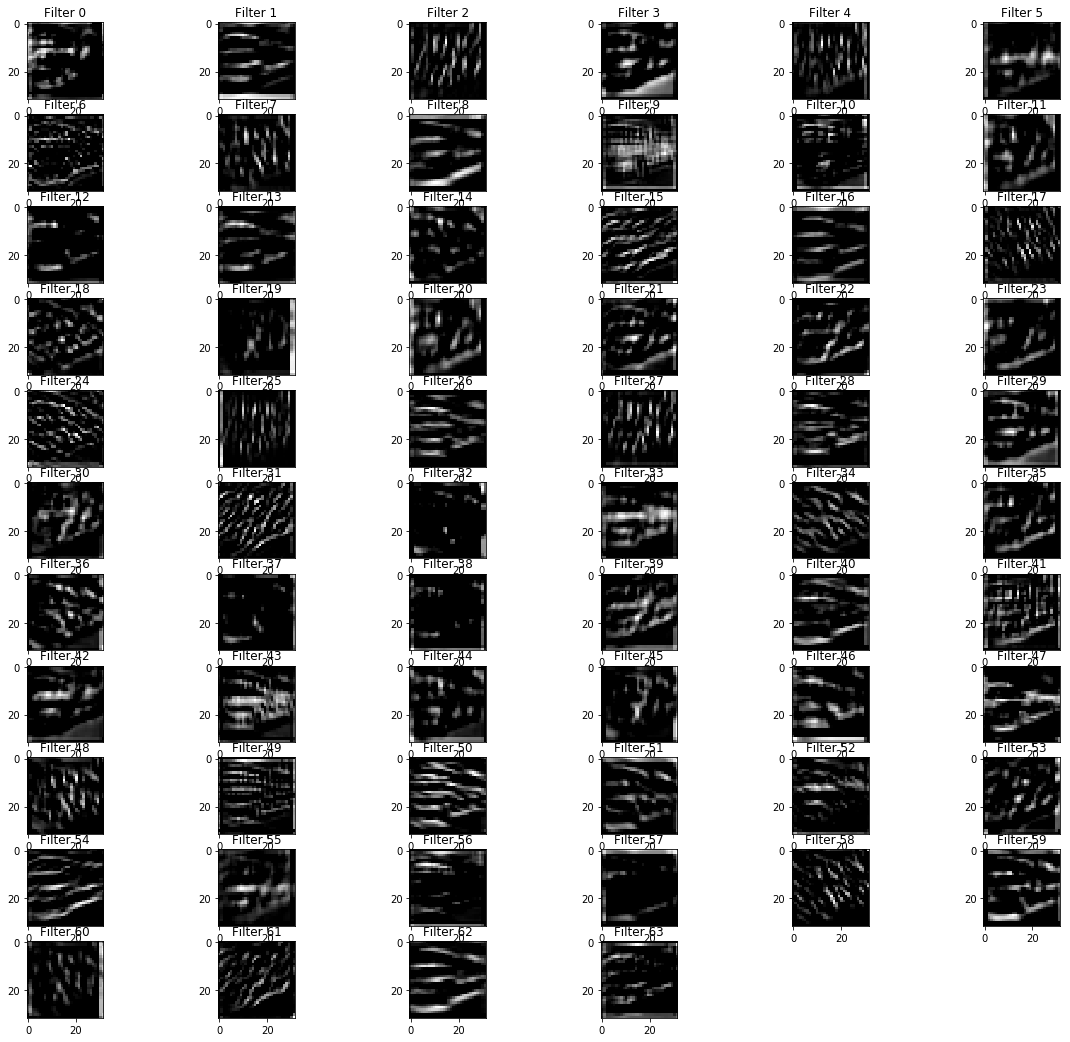

In [0]:
plotActivations(conv1_fmaps)

## Next Steps

### In clasa

1. Modificati parametri convolutiilor si dense (fully connected), * pastrand constanta arhitectura retelei* (doar din argument_scope diferit)
   Aveti in vedere:
    * Tipul de activare (relu, tanh)
    * Adaugati regularizare, normalizare batchnorm
    * input preprocessing
    * Adaugati batch norm si trageti concluzii

2. Observati layer-ele de MaxPooling2D. Ce fac aceste layere? Cu ce puteti inlocui layer-ul maxpool2d pastrand efectul pe dimensiuni?
  
Trageti concluzii in baza observatiilor.
Hints:
  * learning-rate-ul poate fi modificat
  * poate fi schimbat optimizatorul
  * lasati la antrenat cam 30 - 90 de epoci. Eu am antrenat 100K iteratii cu batch size 32. Pentru 50k imagini de train, inseamna 60 epoci.
  * Cu batch norm veti osberva diferenta in training.





### Acasa

** (10 p) ** 


1. Feel free sa experimentati pe CIFAR-10 cu:
  * arhitecturi imbunatatite 
  * data normalization
  * data augmentation
  * target-ul de performanta este > 78 %.
  
2. Masurarea acuratetii pe clasa.
3. Afisati top-3 probabilitati Sotfmax pentru 5 imagini impreauna cu clasa corespunzatoare. Puteti folosi matplotlib pentru a afisa probaiblitatile sub forma de barchart

Nota:

Pentru augmentare puteti folosi codul deja existent mai sus in functia ` def _process_image(augment_level, image)`. Aadaugati o operatie tensorflow in input:

```

if is_training:
    scaled_input_tensor = tf.scalar_mul((1.0 / 255), _process_image(1, image_input))
else:
    scaled_input_tensor = tf.scalar_mul((1.0 / 255), self.image_input)

scaled_input_tensor = tf.subtract(scaled_input_tensor, 0.5)
self.scaled_input_tensor = tf.multiply(scaled_input_tensor, 2.0)

```

Mai sus se opereaza folosind `_process_image` augmenatere de brightnes si saturation.
Inainte, input-ul este normalizat.


Normalizarea se efectueaza atat la training cat si la testing.
Augmentarea se efectueaza doar la testing si are rol in generelizare.

Puteti folosi si horizontal flipping `tf.image.random_flip_left_right`

https://www.tensorflow.org/api_docs/python/tf/image/random_flip_left_right




** Bonus **

### Project: Build a Traffic Sign Recognition Program ###

Dataset-ul CIFAR-10 are clasele balansate si doar 10 clase.
Dataset-ul German Traffic Signs are clasele nebalansate. Astfel va beneficia mai mult de data augmentation.

Mai multe detalii gasiti la:

https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb
https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project


### Pasi pentru proiect ###
1. Descracati dataset-ul
https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip
2. Clonati proiectul
git clone https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project

3. Urmariti pasii din notebook
cd CarND-Traffic-Sign-Classifier-Project
Launch the Jupyter notebook: jupyter notebook Traffic_Sign_Classifier.ipynb

4. Acuratetea target este > 93 %

Hint: Puteti incepe cu LeNet ca baseline.






